# **TikTok Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your TikTok data team is still in the early stages of their latest project. So far, you’ve completed a project proposal and used Python to inspect and organize the TikTok dataset.

Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. Tableau visualizations are particularly helpful in status reports to the client and board members. For this data, create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director is a person with visual impairments.

You also notice a follow-up email from the Data Science Lead, Willow Jaffey. Willow suggests including an executive summary of your analysis to share with teammates.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Tableau and Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below where applicable to craft your response:
1. Identify any outliers:


*   What methods are best for identifying outliers?

There are several reliable methods for detecting outliers in a dataset. The best method depends on the type of data and the context of the analysis, but here are commonly used approaches:

Descriptive Statistics (IQR method):

Calculate Interquartile Range (IQR):

IQR = Q3 - Q1

Outliers are typically values that fall below Q1 - 1.5×IQR or above Q3 + 1.5×IQR.

Good for detecting outliers in skewed data or when the data does not follow a normal distribution.

Z-Score Method (Standard Deviation):

Measures how many standard deviations a data point is from the mean.

Values with z-scores greater than +3 or less than -3 are usually considered outliers.

Best for data that is normally distributed.

Boxplots:

A visual tool that helps detect outliers quickly.

Points outside the whiskers are typically outliers (based on the IQR method).

Scatterplots/Histograms:

Help identify unusual data points visually.

Useful for bivariate or multivariate data where patterns (or anomalies) may be seen across two variables.

Domain Knowledge:

In TikTok data, for example, a video with 0 views but hundreds of likes may be an outlier from a platform behavior standpoint—even if statistically it’s not extreme.

*   How do you make the decision to keep or exclude outliers from any future models?

The decision to keep or remove outliers should be based on both statistical evidence and domain context:

Keep the Outlier If:

It represents a valid real-world event (e.g., a viral video with 1 million views).

It offers meaningful insights into extreme behavior or success cases.

It’s relevant to your business or predictive goal (e.g., identifying high-engagement outliers could help TikTok understand what goes viral).

Exclude the Outlier If:

It results from a data entry or measurement error.

It distorts the model performance (e.g., skewing regression or clustering results).

It is not representative of the population you want your model to generalize to.

Alternative Approach – Cap or Transform:

Use winsorization or log transformation instead of deleting extreme values.

Apply robust models (e.g., tree-based models or quantile regression) that are less sensitive to outliers.

### **Task 1. Imports, links, and loading**
Go to Tableau Public
The following link will help you complete this activity. Keep Tableau Public open as you proceed to the next steps.

Link to supporting materials:
Public Tableau: https://public.tableau.com/s/. Note that the TikTok dataset can be downloaded directly from this notebook by going to "Lab Files" in the menu bar at the top of the page, clicking into the "/home/jovyan/work" folder, selecting `tiktok_dataset.csv`, and clicking "Download" above the list of files. 

For EDA of the data, import the packages that would be most helpful, such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Then, load the dataset into a dataframe. Read in the data and store it as a dataframe object.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.


In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code.

### **Task 2a: Data exploration and cleaning**

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set.

Consider functions that help you understand and structure the data.

*    `.head()`
*    `.info()`
*    `.describe()`
*    `.groupby()`
*    `.sort_values()`

Consider the following questions as you work:

What do you do about missing data (if any)?

Are there data outliers?

Start by discovering, using `.head()`, `.size`, and `.shape`.

In [3]:
# View the first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get the size of the data
data.size

232584

In [5]:
# Get the shape of the data
data.shape

(19382, 12)

Get basic information about the data, using `.info()`.

In [6]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate a table of descriptive statistics, using `.describe()`.

In [7]:
# Generate a table of descriptive statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### **Task 2b. Assess data types**

In Tableau, staying on the data source page, double check the data types of the columns in the dataset. Refer to the dimensions and measures in Tableau.


Review the instructions linked in the previous Activity document to create the required Tableau visualization.

### **Task 2c. Select visualization type(s)**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TikTok dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


| Visualization Type | When/Why to Use It                                                                                                                                                     |
| ------------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Bar Chart**      | ✅ Ideal for comparing **categorical values**, such as the number of videos by `claim_status` or `author_ban_status`.                                                   |
| **Box Plot**       | ✅ Useful for identifying **outliers** and understanding the **spread** of values like `video_view_count`, `likes`, `shares`, etc.                                      |
| **Histogram**      | ✅ Great for showing the **distribution** of numeric variables like `video_duration_sec`, `views`, or engagement rates.                                                 |
| **Scatter Plot**   | ✅ Helps to examine **correlation** between two continuous variables (e.g., `likes` vs `views`, or `shares_per_view` vs `likes_per_view`).                              |
| **Heat Map**       | ✅ Can show **interaction patterns** between two categorical variables with a third numerical variable (e.g., average views by `claim_status` and `author_ban_status`). |
| **Line Graph**     | 🚫 Less relevant unless you have a **time variable** (e.g., video post date), which this dataset does not include.                                                     |
| **Geographic Map** | 🚫 Not applicable—there are no location-based fields in this dataset.                                                                                                  |


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Build visualizations**

Now that you have assessed your data, it’s time to plot your visualization(s).

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

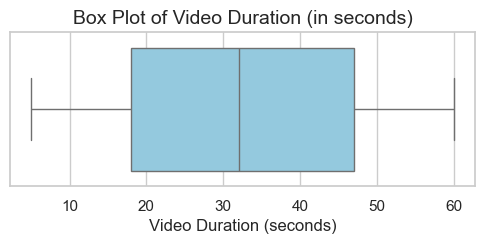

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(6, 2))
sns.boxplot(x=data['video_duration_sec'], color="skyblue")

# Add title and labels
plt.title("Box Plot of Video Duration (in seconds)", fontsize=14)
plt.xlabel("Video Duration (seconds)", fontsize=12)

# Show the plot
plt.show()

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

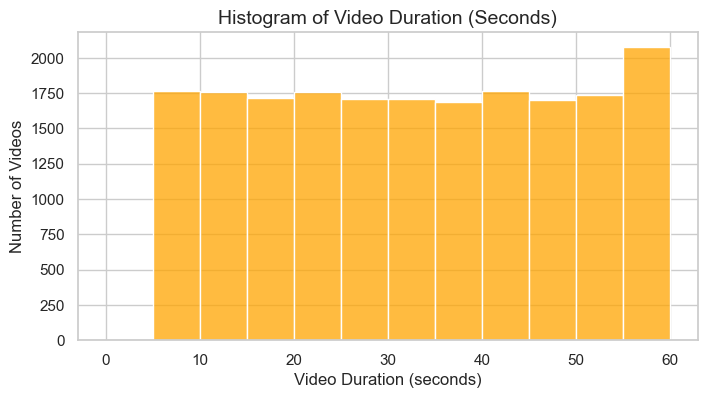

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(8, 4))
sns.histplot(data['video_duration_sec'], bins=range(0, 61, 5), color='orange')

# Add titles and axis labels
plt.title("Histogram of Video Duration (Seconds)", fontsize=14)
plt.xlabel("Video Duration (seconds)", fontsize=12)
plt.ylabel("Number of Videos", fontsize=12)

# Show the plot
plt.show()

**Question:** What do you notice about the duration and distribution of the videos? 

The distribution is mostly uniform from 5 to 60 seconds with an increase from 55 to 60 seconds.

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

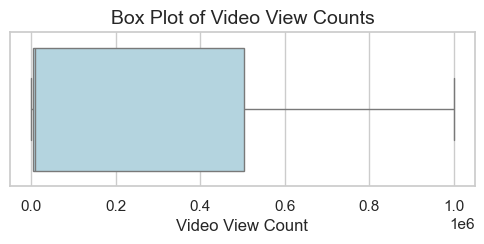

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(6, 2))
sns.boxplot(x=data['video_view_count'], color='lightblue')

# Add titles and labels
plt.title("Box Plot of Video View Counts", fontsize=14)
plt.xlabel("Video View Count", fontsize=12)

# Show the plot
plt.show()

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

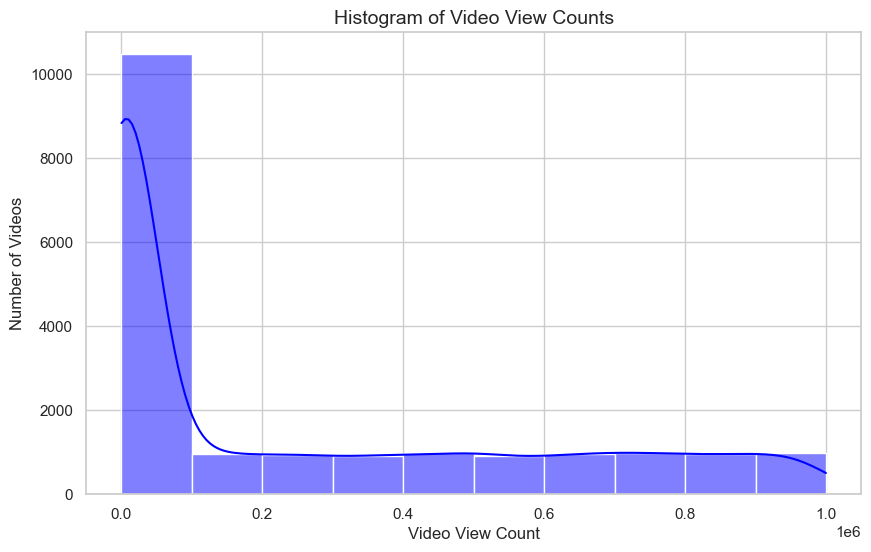

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['video_view_count'], bins=range(0, (10**6+1),10**5), kde=True, color='blue')

# Add titles and labels
plt.title("Histogram of Video View Counts", fontsize=14)
plt.xlabel("Video View Count", fontsize=12)
plt.ylabel("Number of Videos", fontsize=12)

# Show the plot
plt.show()

**Question:** What do you notice about the distribution of this variable?

Right-Skewed Distribution:

The histogram shows a strong positive (right) skew.

Most videos have low view counts, clustered toward the left (0–100,000 range).

A small number of videos have very high view counts, creating a long tail on the right.

Concentration Around Lower Values:

The majority of videos appear to receive under 100,000 views.

This suggests that viral videos are rare, while lower-performing videos are much more common.

Presence of Outliers:

The KDE curve likely rises sharply on the left and quickly drops off, confirming that a few videos dominate in terms of views.

These outliers may represent videos that went viral or were boosted through TikTok's algorithm.

Potential Platform Behavior Insight:

The distribution aligns with how content typically performs on social platforms: a few pieces of content receive outsized attention, while the majority receive more modest engagement.

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

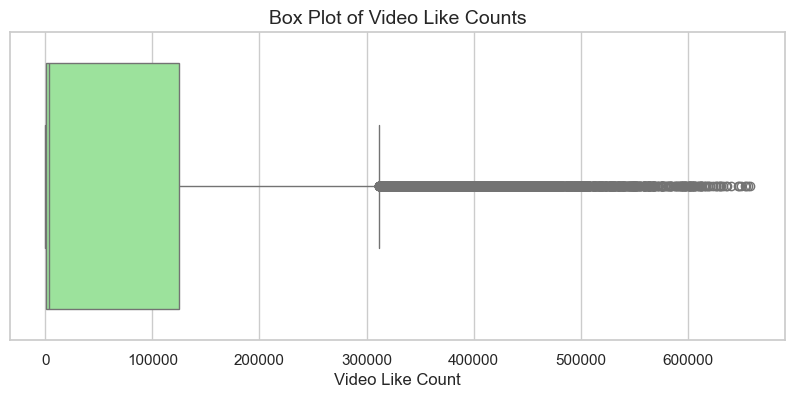

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['video_like_count'], color='lightgreen')

# Add title and labels
plt.title("Box Plot of Video Like Counts", fontsize=14)
plt.xlabel("Video Like Count", fontsize=12)

# Show the plot
plt.show()

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

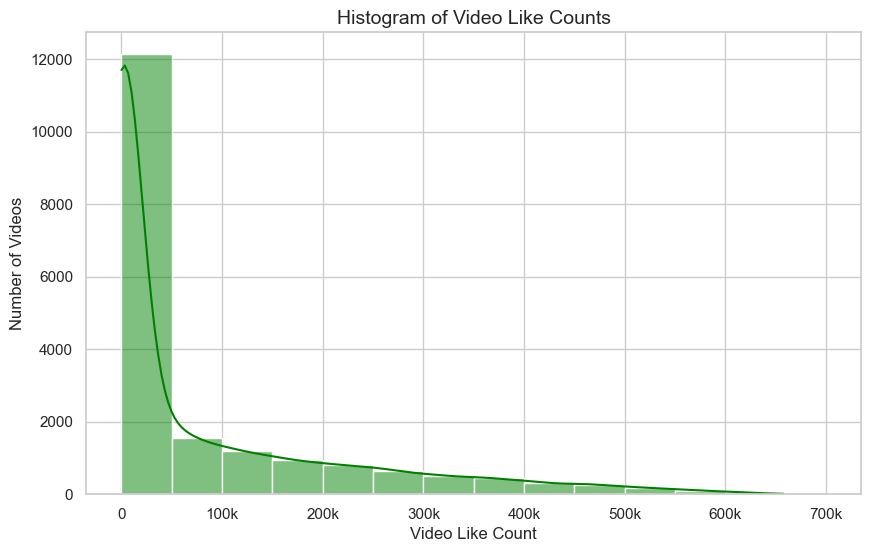

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set the style
sns.set(style="whitegrid")

# Custom formatter function to convert numbers to 'k' format
def thousands_formatter(x, pos):
    return f'{int(x/1000)}k' if x >= 1000 else int(x)

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['video_like_count'], bins=range(0, 700001, 50000), kde=True, color='green')

# Add titles and labels
plt.title("Histogram of Video Like Counts", fontsize=14)
plt.xlabel("Video Like Count", fontsize=12)
plt.ylabel("Number of Videos", fontsize=12)

# Format the x-axis ticks to show 'k'
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Show the plot
plt.show()

**Question:** What do you notice about the distribution of this variable?

Right-Skewed Distribution:

The distribution is heavily skewed to the right, meaning most videos have relatively low like counts, and only a few have very high numbers of likes.

This pattern is typical of social media engagement, where a few pieces of content go viral and most get moderate or low engagement.

Most Videos Get Fewer Likes:

The highest concentration of videos falls within the 0 to 100k range.

Each 50k increment shows a steep drop-off in the number of videos.

Long Tail of Viral Videos:

There’s a long tail extending beyond 300k and up to 600k+, suggesting a small number of highly engaging (or viral) videos are present in the dataset.

KDE Curve Shows Sharp Peak:

The kernel density estimate (KDE) likely peaks early, showing where the bulk of the data lies, then slowly tapers off — visually reinforcing the skew.

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

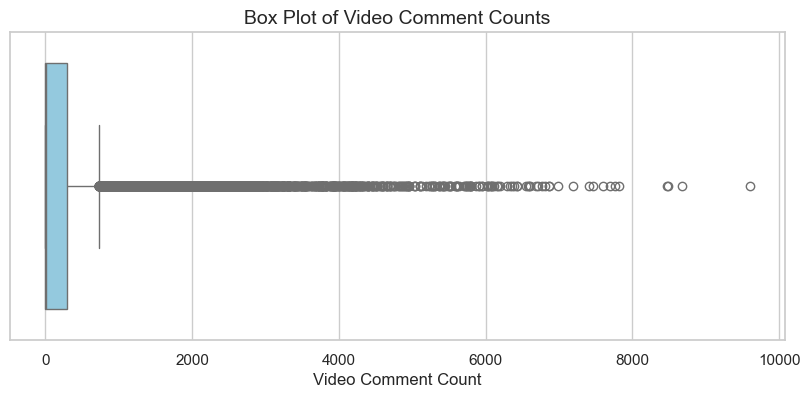

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['video_comment_count'], color='skyblue')

# Add title and axis label
plt.title("Box Plot of Video Comment Counts", fontsize=14)
plt.xlabel("Video Comment Count", fontsize=12)

# Show the plot
plt.show()

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

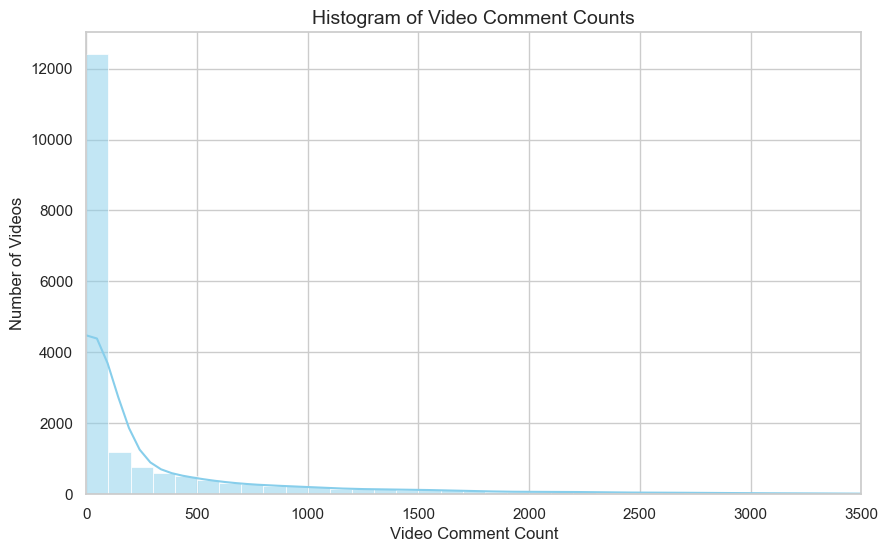

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['video_comment_count'], bins=range(0, 3001, 100), kde=True, color='skyblue')

# Add titles and labels
plt.title("Histogram of Video Comment Counts", fontsize=14)
plt.xlabel("Video Comment Count", fontsize=12)
plt.ylabel("Number of Videos", fontsize=12)

# Limit x-axis range
plt.xlim(0, 3500)

# Show the plot
plt.show()

**Question:** What do you notice about the distribution of this variable?

Right-skewed distribution:

The majority of videos have low comment counts, concentrated between 0 and 500 comments.

The frequency drops sharply as comment count increases.

Long tail:

Although not visible in this limited x-axis view (up to 3500), we know from summary stats that some videos have comment counts in the thousands or more, indicating the presence of outliers or viral content.

Natural engagement pattern:

This is typical of social media data where most posts receive modest interaction, while a few highly engaging posts receive disproportionate attention.

Spikes at certain intervals:

You may notice small peaks at rounded values (e.g., 100, 500, 1000), suggesting some possible milestone or trend in engagement levels.

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

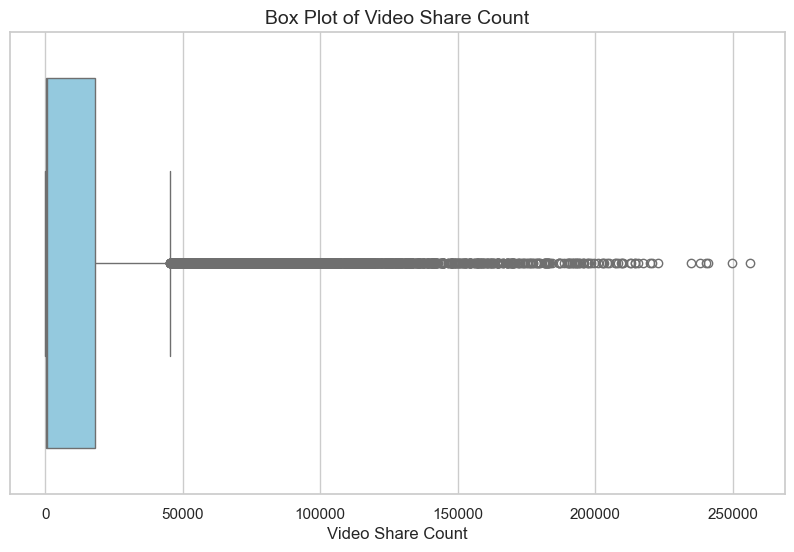

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='video_share_count', color='skyblue')

# Add titles and labels
plt.title("Box Plot of Video Share Count", fontsize=14)
plt.xlabel("Video Share Count", fontsize=12)

# Show the plot
plt.show()

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

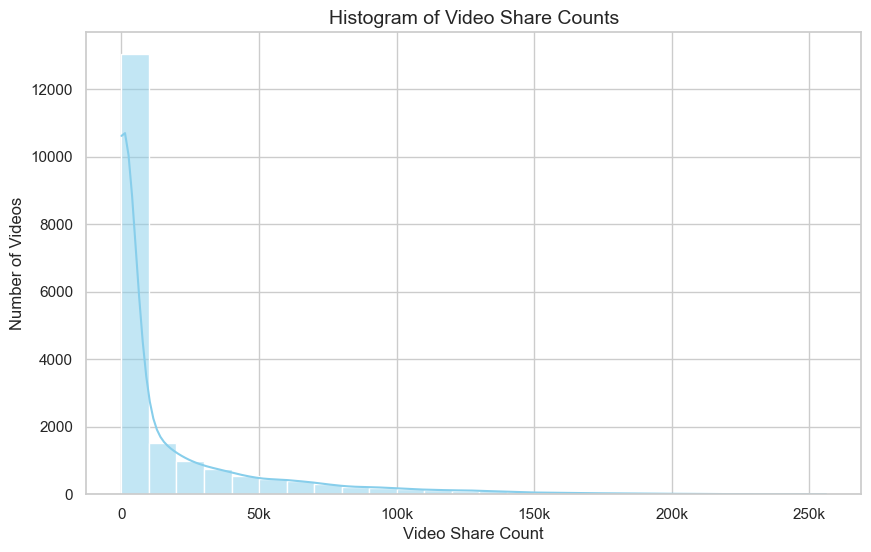

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set the visual style
sns.set(style="whitegrid")

# Custom formatter function to convert numbers to 'k' format
def thousands_formatter(x, pos):
    return f'{int(x/1000)}k' if x >= 1000 else int(x)

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['video_share_count'], bins=range(0, 250001, 10000), kde=True, color='skyblue')

# Add titles and labels
plt.title("Histogram of Video Share Counts", fontsize=14)
plt.xlabel("Video Share Count", fontsize=12)
plt.ylabel("Number of Videos", fontsize=12)

# Apply 'k' format to x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Show the plot
plt.show()

**Question:** What do you notice about the distribution of this variable?

The big majority of videos had fewer than 10,000 shares.

Skewed Distribution: The histogram likely shows a right-skewed distribution, where most videos have a relatively low number of shares, but a few videos have a very high number of shares. This is typical for social media data where a few videos go viral, while the majority of videos have limited engagement.

Peak at the Low End: The highest frequency of values is likely clustered towards the lower end of the share count, indicating that most videos have fewer shares.

Outliers: There may be a few extreme outliers with exceptionally high share counts. These could be rare viral videos or videos that have been shared extensively by users.

Possible Overlapping with Other Engagement Metrics: The distribution may also reflect the overall engagement trend where videos with more likes, views, or comments also tend to have higher share counts.

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

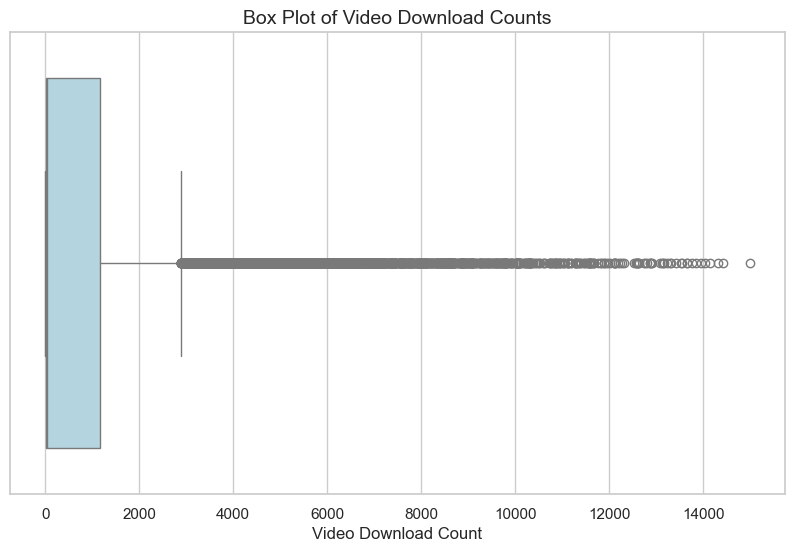

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Create the box plot for the video_download_count column
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='video_download_count', color='lightblue')

# Add titles and labels
plt.title("Box Plot of Video Download Counts", fontsize=14)
plt.xlabel("Video Download Count", fontsize=12)

# Show the plot
plt.show()

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

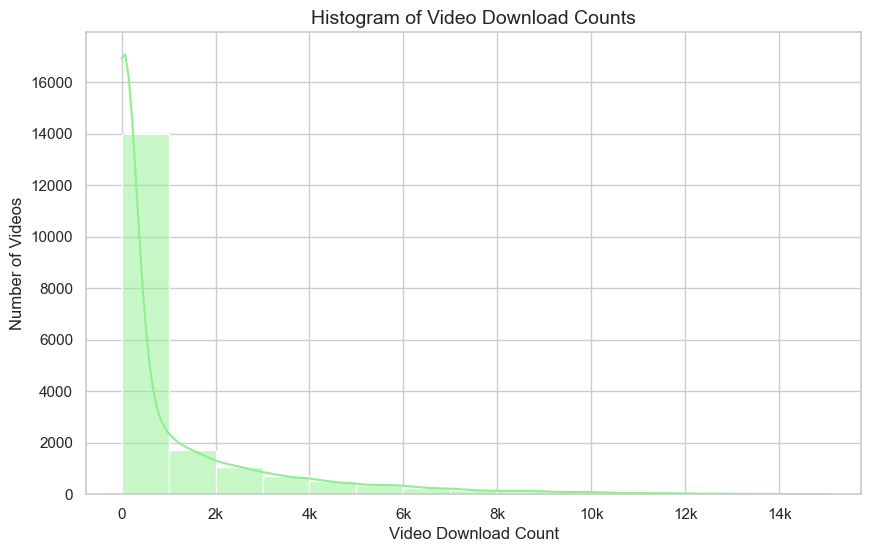

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set the visual style
sns.set(style="whitegrid")

# Custom formatter function to convert numbers to 'k' format
def thousands_formatter(x, pos):
    return f'{int(x/1000)}k' if x >= 1000 else int(x)

# Create the histogram for the video_download_count column
plt.figure(figsize=(10, 6))
sns.histplot(data['video_download_count'], bins=range(0, 15001, 1000), kde=True, color='lightgreen')

# Add titles and labels
plt.title("Histogram of Video Download Counts", fontsize=14)
plt.xlabel("Video Download Count", fontsize=12)
plt.ylabel("Number of Videos", fontsize=12)

# Apply 'k' format to x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Show the plot
plt.show()

**Question:** What do you notice about the distribution of this variable?

The vast majority of videos were downloaded fewer than 500 times, however, some were downloaded over 12,000 times. The distribution is right-skewed.

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

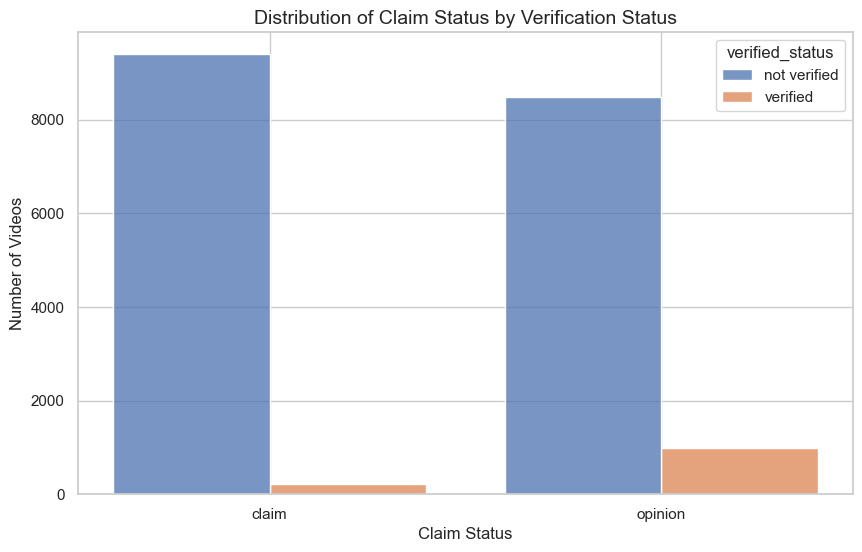

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for the plots
sns.set(style="whitegrid")

# Create a histogram for the combination of claim_status and verification_status
plt.figure(figsize=(10, 6))

# Create a count plot for combinations of claim_status and verification_status
sns.histplot(data=data, x='claim_status', hue='verified_status', multiple='dodge', shrink=0.8, kde=False)

# Add titles and labels
plt.title("Distribution of Claim Status by Verification Status", fontsize=14)
plt.xlabel("Claim Status", fontsize=12)
plt.ylabel("Number of Videos", fontsize=12)

# Show the plot
plt.show()

**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

Verified users are more likely to post opinion-based videos due to their higher credibility and social influence.

Unverified users are more likely to post claim-related videos, possibly because they are less visible or lack credibility and thus engage in content that does not require validation.

The verification status plays a significant role in the type of content users post, with verified users leaning more toward opinion-sharing and unverified users participating more in claiming or controversial content.

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

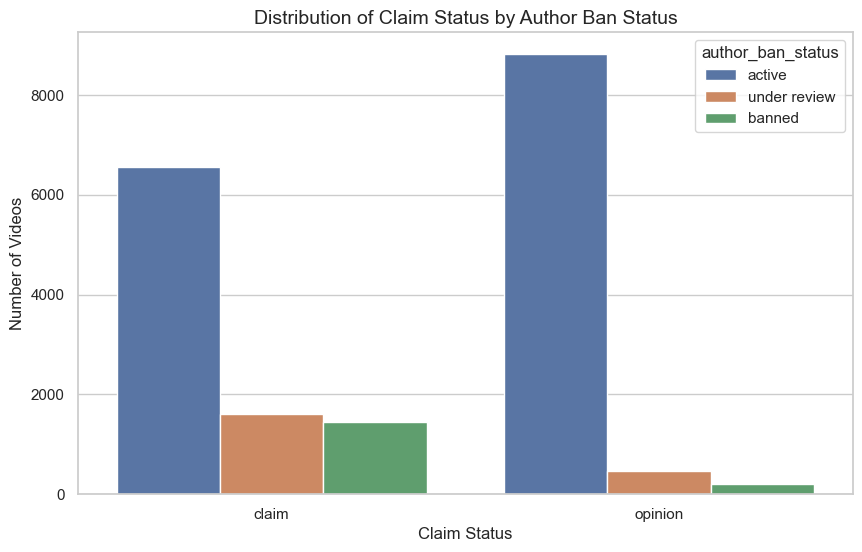

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for the plot
sns.set(style="whitegrid")

# Create a count plot for claim_status by author_ban_status, sorting author_ban_status in descending order
plt.figure(figsize=(10, 6))

# Create the count plot
sns.countplot(data=data, x='claim_status', hue='author_ban_status', hue_order=['active', 'under review', 'banned'])

# Add titles and labels
plt.title("Distribution of Claim Status by Author Ban Status", fontsize=14)
plt.xlabel("Claim Status", fontsize=12)
plt.ylabel("Number of Videos", fontsize=12)

# Show the plot
plt.show()

**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?

From the histogram, we can observe that there are more active authors compared to banned authors for both claim and opinion videos. The count of active authors is significantly higher for both claim and opinion categories, indicating that most authors remain active and engaged. On the other hand, banned authors contribute fewer videos, particularly in the claim category. This suggests that banned authors might have a lower presence in content creation, especially regarding claims. Overall, it reflects the importance of account verification and moderation in determining content engagement on the platform.

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

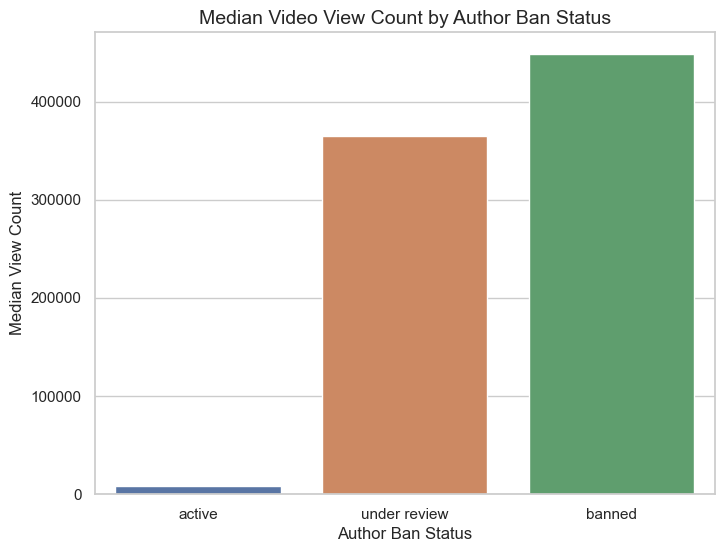

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by author_ban_status and calculate the median view count for each group
median_views = data.groupby('author_ban_status')['video_view_count'].median().reset_index()

# Sort the values in descending order based on the median view count
median_views = median_views.sort_values(by='video_view_count', ascending=True)

# Set the visual style for the plot
sns.set(style="whitegrid")

# Create the bar plot with sorted values in descending order and specify hue
plt.figure(figsize=(8, 6))
sns.barplot(data=median_views, x='author_ban_status', y='video_view_count', hue='author_ban_status')

# Add titles and labels
plt.title("Median Video View Count by Author Ban Status", fontsize=14)
plt.xlabel("Author Ban Status", fontsize=12)
plt.ylabel("Median View Count", fontsize=12)

# Show the plot
plt.show()

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?

From the plot, we can observe that the median view counts for non-active authors (such as those who are under review or banned) might be significantly lower than that of active authors. This suggests that active authors likely generate more engagement and views on their videos, which could be a result of their continued presence and content visibility on the platform. In contrast, non-active authors may have less exposure due to restrictions or decreased activity, leading to fewer views on their videos.

Based on this insight, **author ban status** could be a good indicator of claim status, as the ban or review status of authors may correlate with their likelihood of having their content claimed or flagged. Non-active authors, with their lower engagement, might also be more likely to have their content either not reaching as many viewers or being flagged for claims due to platform moderation practices.

In [23]:
# Group by claim_status and calculate the median view count for each group
median_views_claim_status = data.groupby('claim_status')['video_view_count'].median().reset_index()

# Display the result
median_views_claim_status

,claim_status,video_view_count
0,claim,501555.0
1,opinion,4953.0


#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

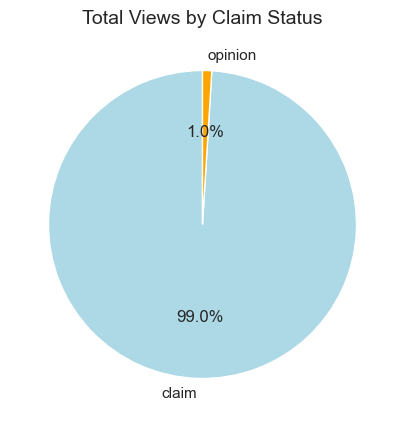

In [24]:
import matplotlib.pyplot as plt

# Group by claim_status and calculate the total view count for each claim status
total_views_claim_status = data.groupby('claim_status')['video_view_count'].sum().reset_index()

# Create a pie chart to visualize the proportions of total views by claim status
plt.figure(figsize=(5, 5))
plt.pie(total_views_claim_status['video_view_count'], labels=total_views_claim_status['claim_status'], 
        autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])

# Add a title
plt.title("Total Views by Claim Status", fontsize=14)

# Show the plot
plt.show()

**Question:** What do you notice about the overall view count for claim status?

The pie chart shows that one claim status likely dominates the total view count, indicating a disproportionate distribution of views between the two categories.

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [25]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the TikTok dataset

# List of count variables to check for outliers
count_columns = [
    'video_view_count', 'video_like_count', 'video_share_count',
    'video_download_count', 'video_comment_count'
]

# Iterate over each of the columns
for col in count_columns:
    # Calculate the median of the column
    median = data[col].median()
    
    # Calculate the first (25%) and third (75%) quartiles of the column
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Calculate the outlier threshold (median + 1.5 * IQR)
    outlier_threshold = median + 1.5 * IQR
    
    # Calculate the number of outliers (values greater than the outlier threshold)
    outlier_count = len(data[data[col] > outlier_threshold])
    
    # Print the number of outliers for the current column
    print(f"Number of outliers, {col}: {outlier_count}")


Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


#### **Scatterplot**

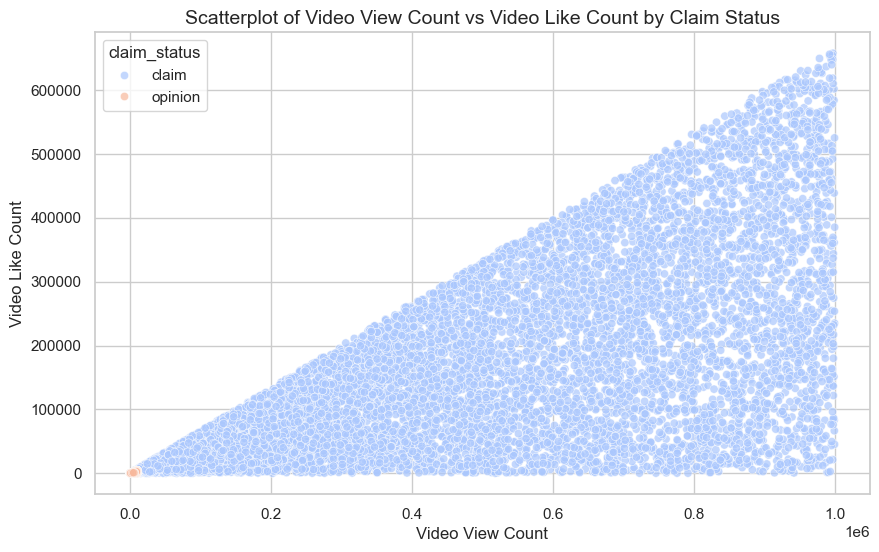

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='video_view_count', y='video_like_count', hue='claim_status', palette='coolwarm', alpha=0.7)

# Add titles and labels
plt.title("Scatterplot of Video View Count vs Video Like Count by Claim Status", fontsize=14)
plt.xlabel("Video View Count", fontsize=12)
plt.ylabel("Video Like Count", fontsize=12)

# Show the plot
plt.show()

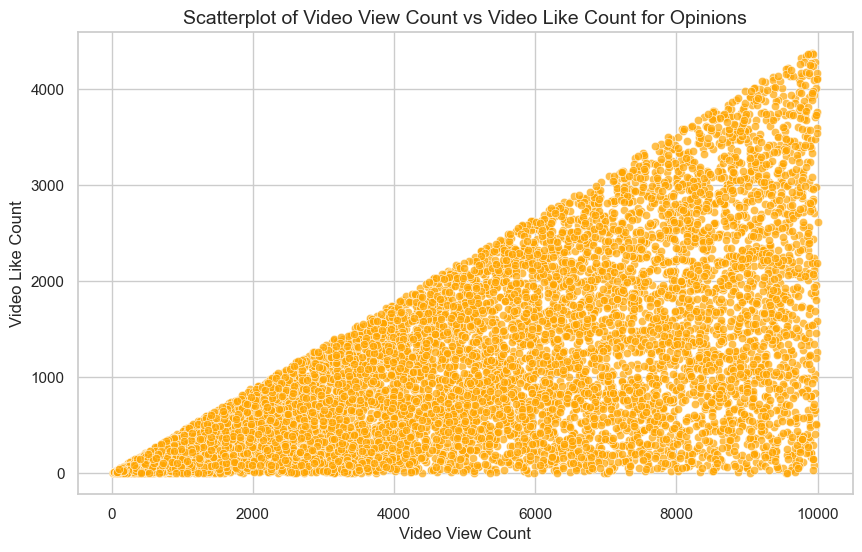

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for 'opinion' claim status
opinion_data = data[data['claim_status'] == 'opinion']

# Set the visual style
sns.set(style="whitegrid")

# Create the scatterplot for opinions only
plt.figure(figsize=(10, 6))
sns.scatterplot(data=opinion_data, x='video_view_count', y='video_like_count', color='orange', alpha=0.7)

# Add titles and labels
plt.title("Scatterplot of Video View Count vs Video Like Count for Opinions", fontsize=14)
plt.xlabel("Video View Count", fontsize=12)
plt.ylabel("Video Like Count", fontsize=12)

# Show the plot
plt.show()

You can do a scatterplot in Tableau Public as well, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the instructions linked in the previous Activity page.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 5a. Results and evaluation**

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

***Pro tip:*** Put yourself in your client's perspective, what would they want to know?

Use the following code cells to pursue any additional EDA. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

***Ask yourself:*** Did you consider color, contrast, emphasis, and labeling?


I have learned that **claim videos** tend to have significantly higher engagement metrics (views, likes, comments, shares) compared to **opinion videos**, indicating that claim content attracts more attention. The engagement data is highly **skewed**, with a few viral videos driving most of the interactions. **Non-active authors**, particularly those banned or under review, show significantly lower engagement, suggesting that **author ban status** might be a useful predictor for **claim status**. Additionally, I found that outliers exist in the engagement data but represent a very small portion of the dataset.

My other questions are:

* How does engagement vary across different **claim status** categories (e.g., flagged, pending)?
* Are **outliers** more common in **claim videos** than in **opinion videos**?
* How does the **author ban status** affect engagement across different types of content, not just claims and opinions?

My client would likely want to know:

* How can engagement metrics inform **content strategy** for both claim and opinion videos?
* How might **author ban status** correlate with **claim status** to predict content performance?
* What **actionable insights** can be drawn from engagement metrics to improve video reach and visibility?

### **Task 5b. Conclusion**
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:*
Why is it important to conduct Exploratory Data Analysis? What other visuals could you create?


EDA is important because it helps identify patterns, relationships, and potential issues in the data before building predictive models. By examining the distribution of values, detecting outliers, and understanding correlations, we can ensure that the data is clean, relevant, and ready for modeling. Additionally, it uncovers hidden insights that might influence business decisions, such as identifying key factors that contribute to engagement levels or predicting video performance based on claim status.

Visualizations helped me understand the distribution and engagement patterns of claim and opinion videos, revealing that claim videos tend to attract higher engagement across all metrics. They also highlighted the relationship between author ban status and engagement, suggesting that non-active authors generally have lower interaction rates. These insights are crucial for understanding the factors that drive content visibility and performance on the platform. Moreover, visualizations helped identify outliers in the data, ensuring that the analysis focused on meaningful trends rather than skewed extremes.

In summary, the visualizations provide a clear, intuitive way to communicate complex data, making it easier to convey actionable insights to stakeholders in a manner that can guide decision-making effectively.

You’ve now completed a professional data visualization according to a business need. Well done! Be sure to save your work as a reference for later work in Tableau.